In [1]:
from pathlib import Path
import re
import struct
import math
from pprint import pprint
# import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
import numpy as np
from IPython.display import HTML


In [6]:
DAT_BASEDIR = Path('../build-Debug/out')

input_files = sorted(list(DAT_BASEDIR.glob('*.bin')))


def read_dat(file: Path):
    ar = np.array(struct.unpack(f'{file.stat().st_size//8}d', file.read_bytes()))
    return ar.reshape((int(math.sqrt(ar.shape[0])), -1))

images = list(map(read_dat, input_files))



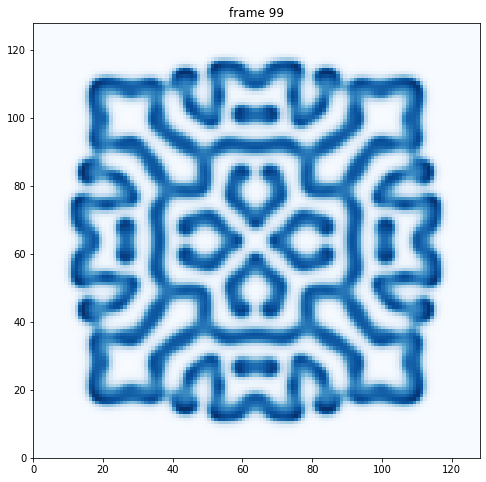

In [9]:
def update(i, ax, images):
    if i != 0:
        plt.cla()
    heatmap = ax.pcolor(images[i], cmap=plt.cm.Blues)
    ax.set_title(f'frame {i}')
    plt.autoscale(enable=True, axis='both')

plt.ioff()
fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_alpha(1)
anim = animation.FuncAnimation(fig, update, fargs = (ax, images), interval = 100, frames = len(images))
# ani.save("test.gif", writer = 'imagemagick')
anim.save("test.gif")
anim

